In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data',
                                        train = True,
                                        download = True,
                                        transform = transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = batch_size,
                                          shuffle = True)

testset = torchvision.datasets.CIFAR10(root = './data',
                                       train = False,
                                       download = True,
                                       transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = batch_size,
                                         shuffle = False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [5]:
trainloader

In [4]:
dataiter = iter(trainloader)

In [5]:
images, labels = next(dataiter)

In [6]:
def imshow(img, label):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(label)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

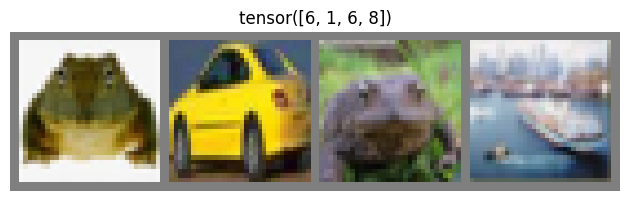

In [7]:
imshow(torchvision.utils.make_grid(images), labels)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
model = CNN().to(device)

In [10]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
epochs = 5
n_total_steps = len(trainloader)

In [11]:
for epoch in range(1, epochs + 1):
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        predictions = model(images)

        loss = criterion(predictions, labels)

        loss.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()

        if (i % 4000) == 0:
            print(f"Epoch # {epoch} / {epochs}, step # {i} / {n_total_steps}, loss: {loss.item():.3f}")

Epoch # 1 / 5, step # 0 / 12500, loss: 2.346
Epoch # 1 / 5, step # 4000 / 12500, loss: 2.321
Epoch # 1 / 5, step # 8000 / 12500, loss: 2.289
Epoch # 1 / 5, step # 12000 / 12500, loss: 1.701
Epoch # 2 / 5, step # 0 / 12500, loss: 1.813
Epoch # 2 / 5, step # 4000 / 12500, loss: 2.164
Epoch # 2 / 5, step # 8000 / 12500, loss: 1.571
Epoch # 2 / 5, step # 12000 / 12500, loss: 1.408
Epoch # 3 / 5, step # 0 / 12500, loss: 2.432
Epoch # 3 / 5, step # 4000 / 12500, loss: 1.945
Epoch # 3 / 5, step # 8000 / 12500, loss: 2.012
Epoch # 3 / 5, step # 12000 / 12500, loss: 1.393
Epoch # 4 / 5, step # 0 / 12500, loss: 2.056
Epoch # 4 / 5, step # 4000 / 12500, loss: 2.001
Epoch # 4 / 5, step # 8000 / 12500, loss: 1.794
Epoch # 4 / 5, step # 12000 / 12500, loss: 1.914
Epoch # 5 / 5, step # 0 / 12500, loss: 1.613
Epoch # 5 / 5, step # 4000 / 12500, loss: 1.935
Epoch # 5 / 5, step # 8000 / 12500, loss: 1.350
Epoch # 5 / 5, step # 12000 / 12500, loss: 1.239


In [27]:
correct = 0
total = 0
total_predictions = []

with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)

        predictions = model(images)

        _, predictions = torch.max(predictions, 1)

        for prediction in predictions:
            total_predictions.append(prediction.item())

        total += labels.size(0)
        correct += (predictions == labels).sum().item()

accuracy = (correct / total) * 100

In [28]:
print(f'Test Accuracy: {accuracy:.3f}%')

Test Accuracy: 50.280%


In [26]:
torch.save(model.state_dict(), "./saved_models/cifar10cnn.pth")